# "밑바닥부터 시작하는 딥러닝 도서 요약 정리"
> "A summary of DeepLearning from Scratch book. perceptron, multi-layer perceptron, activation function, backpropagation"

- toc: true 
- badges: true
- comments: true
- categories: [deeplearning,backpropagation]
- image: images/chart-preview.png

# 밑바닥부터 시작하는 딥러닝 도서내용을 간단히 정리해 봤다.
## 2장 Perceptron
* AND , NAND, OR 게이트를 구현해 본다.

### AND 게이트

In [4]:
import numpy as np

# 가중치와 편향을 도입한 AND 게이트
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])

    b = -0.7                   # b=-0.7 is bias. b를 기준으로 넘으면 1, 넘지 못하면 0
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
print(AND(0, 0),
      AND(1, 0),
      AND(0, 1),
      AND(1, 1))

0 0 0 1


### NAND 게이트

In [6]:
# NAND 게이트
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # AND와는 w,b 만 다르다. 
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
print(NAND(0, 0),
      NAND(1, 0),
      NAND(0, 1),
      NAND(1, 1))

1 1 1 0


### OR 게이트

In [9]:
# OR 게이트
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])   # AND와는 w,b 만 다르다. 
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [10]:
print(OR(0, 0),
      OR(1, 0),
      OR(0, 1),
      OR(1, 1))

0 1 1 1


### XOR 게이트

In [11]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [12]:
print(XOR(0, 0),
      XOR(1, 0),
      XOR(0, 1),
      XOR(1, 1))

0 1 1 0


### 그래프로 확인

In [27]:
import matplotlib.pylab as plt
xs = np.arange(-1.2, 1.2, 0.1)
ys = np.arange(-1.2, 1.2, 0.1)

In [28]:
k=list()
j=list()
for x in xs:
    for y in ys:
        z= AND(x,y)      # 여기를 바꿔주면 AND, OR, NAND, XOR 그림을 바꾸면서 그릴수 있음
        k.append(z)
        j.append([x, y, z])

In [29]:
print(type(j), len(j))

<class 'list'> 576


In [30]:
nj=np.asarray(j)
#hide
nj

array([[-1.2, -1.2,  0. ],
       [-1.2, -1.1,  0. ],
       [-1.2, -1. ,  0. ],
       ...,
       [ 1.1,  0.9,  1. ],
       [ 1.1,  1. ,  1. ],
       [ 1.1,  1.1,  1. ]])

In [31]:
print(type(nj), len(nj), nj.ndim, nj.shape)

<class 'numpy.ndarray'> 576 2 (576, 3)


In [32]:
nx= nj[:,0]
ny= nj[:,1]
nz= nj[:,2]

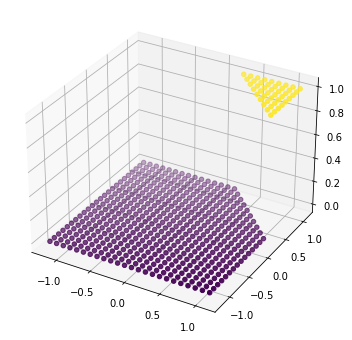

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nx, ny, nz, c=nz)
plt.show()

### graph로 표현

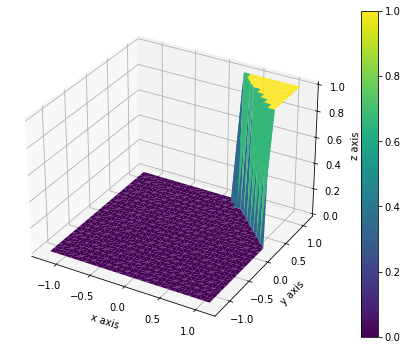

In [46]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
pnt4d=ax.plot_trisurf(nx, ny, nz, cmap='viridis')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
# fig.colorbar(pnt4d, shrink=0.5, aspect=5)
cbar = plt.colorbar(pnt4d)
plt.show()



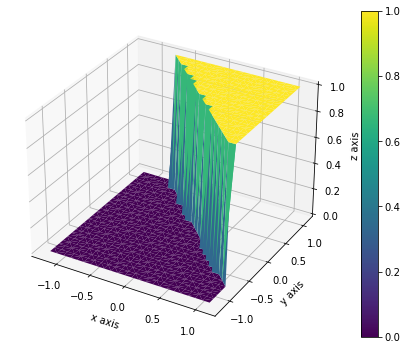

In [48]:
k=list()
j=list()
for x in xs:
    for y in ys:
        z= OR(x,y)      # 여기를 바꿔주면 AND, OR, NAND, XOR 그림을 바꾸면서 그릴수 있음
        k.append(z)
        j.append([x, y, z])

nj=np.asarray(j)
nx= nj[:,0]
ny= nj[:,1]
nz= nj[:,2]

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
pnt4d=ax.plot_trisurf(nx, ny, nz, cmap='viridis')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
# fig.colorbar(pnt4d, shrink=0.5, aspect=5)
cbar = plt.colorbar(pnt4d)
plt.show()

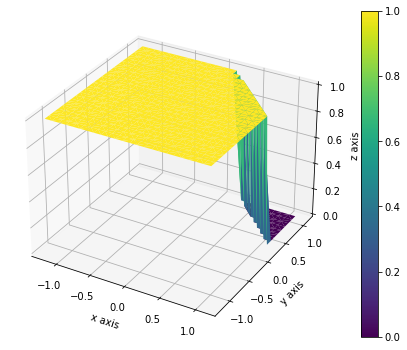

In [49]:
k=list()
j=list()
for x in xs:
    for y in ys:
        z= NAND(x,y)      # 여기를 바꿔주면 AND, OR, NAND, XOR 그림을 바꾸면서 그릴수 있음
        k.append(z)
        j.append([x, y, z])

nj=np.asarray(j)
nx= nj[:,0]
ny= nj[:,1]
nz= nj[:,2]

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
pnt4d=ax.plot_trisurf(nx, ny, nz, cmap='viridis')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
# fig.colorbar(pnt4d, shrink=0.5, aspect=5)
cbar = plt.colorbar(pnt4d)
plt.show()

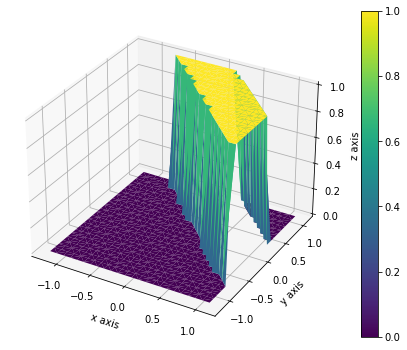

In [50]:
k=list()
j=list()
for x in xs:
    for y in ys:
        z= XOR(x,y)      # 여기를 바꿔주면 AND, OR, NAND, XOR 그림을 바꾸면서 그릴수 있음
        k.append(z)
        j.append([x, y, z])

nj=np.asarray(j)
nx= nj[:,0]
ny= nj[:,1]
nz= nj[:,2]

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
pnt4d=ax.plot_trisurf(nx, ny, nz, cmap='viridis')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
# fig.colorbar(pnt4d, shrink=0.5, aspect=5)
cbar = plt.colorbar(pnt4d)
plt.show()